In [77]:
# training for a simple analysis- comparing PTs and drifts across reaches and nodes
library(dplyr)
library(fuzzyjoin)


#read in data
PT_data=read.csv('/nas/cee-water/cjgleason/calval/Processed data/Brown/Data frames/reprocessed_2023_06_30/reach/NS_PT_reach_wse.csv')%>%
mutate(pt_time_UTC=as.POSIXct(pt_time_UTC))
    drift_data=read.csv('/nas/cee-water/cjgleason/calval/Processed data/Brown/Data frames/reprocessed_2023_06_30/reach/NS_drift_reach_wse_slope.csv')%>%
    group_by(wse_drift_start_UTC)%>%    
    mutate(average_drift_time= mean(c(as.POSIXct(wse_drift_start_UTC),as.POSIXct(wse_drift_end_UTC))))%>%
       ungroup()%>%
        transmute(reach_id=reach_id,drift_time_UTC=average_drift_time,
                  drift_reach_wse_m=mean_reach_drift_wse_m,	reach_wse_precision_m=mean_reach_drift_wse_precision_m)
 
joined_df=left_join(PT_data,drift_data,by='reach_id')%>%
    mutate(time_diff = pt_time_UTC - drift_time_UTC)%>%
    filter(abs(time_diff) < 30*60)


#head(joined_df)



Warning message in left_join(PT_data, drift_data, by = "reach_id"):
“Detected an unexpected many-to-many relationship between `x` and `y`.
ℹ Row 1 of `x` matches multiple rows in `y`.
ℹ Row 1 of `y` matches multiple rows in `x`.
ℹ If a many-to-many relationship is expected, set `relationship =
  "many-to-many"` to silence this warning.”


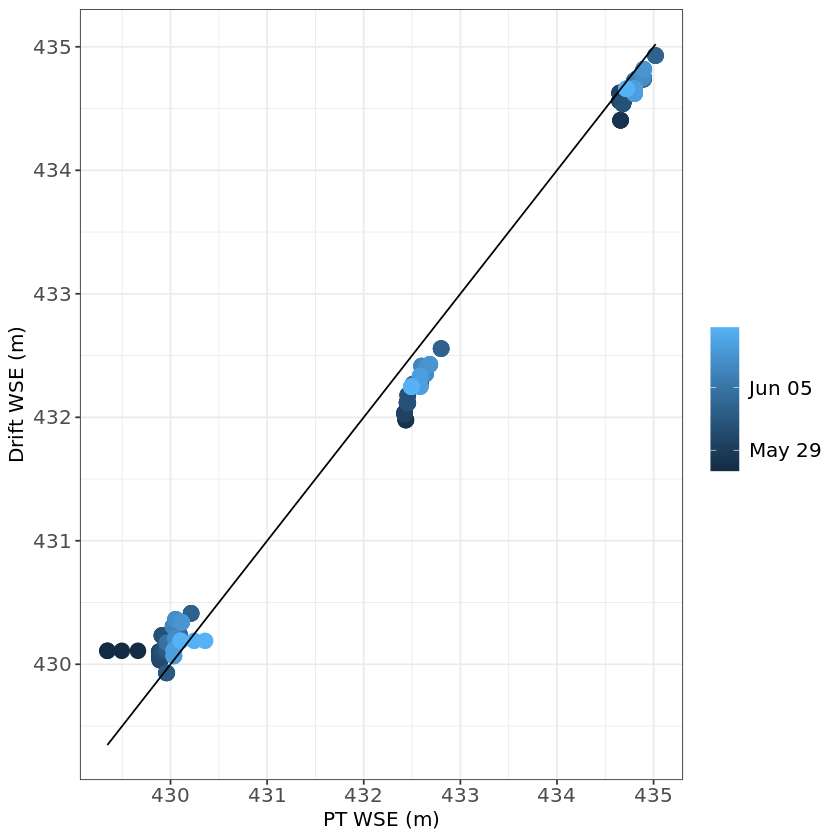

In [78]:
library(ggplot2)

p1= ggplot(joined_df) +
 geom_point(aes(x=mean_reach_pt_wse_m,y=drift_reach_wse_m,col= drift_time_UTC),size=4) +
 geom_line(aes(x=mean_reach_pt_wse_m,y=mean_reach_pt_wse_m))+
# ylab(expression(paste("Q (",m^3, "/s)", sep="")))+
    # xlab("Date")+
ylab("Drift WSE (m)")+
xlab("PT WSE (m)")+
    # ylim(c(0,1))+
   # coord_cartesian(ylim=c(-5, 1))+
      theme_bw() +
   # annotate('text',x=min(plotter$date),y=1.0*max(plotter$flow,na.rm=T),
   #           label= paste('KGE_posterior=',formatC(neobam_KGE_posterior,digits=2)) , size=4,hjust = 0) +
   # annotate('text',x=min(plotter$date),y=0.95*max(plotter$flow,na.rm=T), 
   #           label= paste('NSE_posterior=',formatC(neobam_NSE_posterior,digits=2)) , size=4,hjust = 0) +
   #  annotate('text',x=min(plotter$date),y=0.90*max(plotter$flow,na.rm=T),
   #           label= paste('KGE_recon=',formatC(neobam_KGE_recon,digits=2)) , size=4,hjust = 0) +
   # annotate('text',x=min(plotter$date),y=0.85*max(plotter$flow,na.rm=T), 
   #           label= paste('NSE_recon=',formatC(neobam_NSE_recon,digits=2)) , size=4,hjust = 0) +
   #  ggtitle(neobam_priors_and_data$reachid)+

     # scale_y_continuous(breaks=seq(1,18))+
      theme(legend.text=element_text(size=12),
        legend.title=element_blank(),
            
        #legend.position =c(0.8,0.8),
        axis.text.y= element_text(size=12),
        #legend.position = 'none',
        axis.text.x =element_text(size=12),
        #axis.text.x=element_blank(),
        axis.title.x= element_text(size=12),
            axis.title.y= element_text(size=12),
        #panel.grid.major = element_line(colour = "grey50"),
        plot.title = element_text(color="black", size=12, face="bold.italic")) 
       # legend.background = element_rect(fill=alpha('white',0.8)))
        #axis.text.x = element_text(angle =45, vjust = 1, hjust=1))  

plot(p1)